# IPython2CWL

IPython2CWL is a that converts existing IPython Jupyter Notebooks to CWL Command Lines Tools. The tool requires to annotate the input and output variables. A simple example is described here. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
from ipython2cwl.iotypes import CWLFilePathInput, CWLFilePathOutput

In [2]:
dataset: CWLFilePathInput = 'example.csv'

To expose a variable a variable as a CWL output we can use the basic output data types or the dumpables. 

Let's suppose that the Jupyter Notebook user wants to save the image to a file we can use the CWLFilePathOutput annotation. 

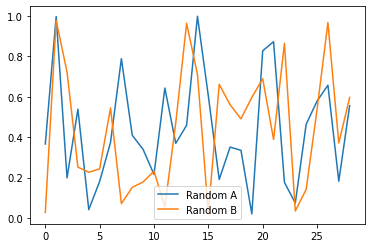

In [3]:
data = pd.read_csv(dataset)
fig = data.plot()

# original data
original_image: CWLFilePathOutput = 'original_data.png'
fig.figure.savefig(original_image)

Now let's say that the Jupyter Notebook user does not want to store the image but in the CWL we want that as an output file. We can use the PNGPlot annotation. The ipython2cwl will store that image to a png file for you in a file with the name `new_data.png`. 

> For more complicated use cases check CWLDumpable in the [docs](https://ipython2cwl.readthedocs.io/)

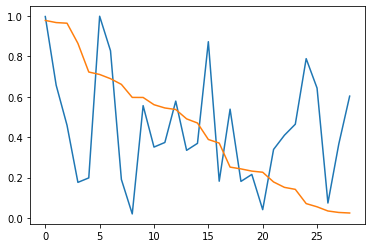

In [4]:
# transform data
import matplotlib.pyplot as plt
data.sort_values(by='Random B', ascending=False, inplace=True, ignore_index=True)
plt.figure()
new_data: 'CWLPNGPlot' = plt.plot(data)

In [5]:
#! jupyter-repo2cwl . -o .
#!open new_data.png

To compile the presented jupyter notebook to a CWL CommandLineTool run the following commands:
```sh
jupyter-repo2cwl . -o .
```

To test the tool as a cwl we can execute the following command:
```sh
cwltool intro.cwl --dataset example.csv
```

`
INFO /Users/dks/.pyenv/versions/3.6.10/bin/cwltool 3.0.20200706173533
INFO Resolved 'intro.cwl' to 'file:///Users/dks/Workspaces/IPython2CWL/examples/intro.cwl'
INFO [job intro.cwl] /private/tmp/docker_tmp7wzg7cbi$ docker \
    run \
    -i \
    --mount=type=bind,source=/private/tmp/docker_tmp7wzg7cbi,target=/Oxibvb \
    --mount=type=bind,source=/private/tmp/docker_tmpje9_oz4b,target=/tmp \
    --mount=type=bind,source=/Users/dks/Workspaces/IPython2CWL/examples/example.csv,target=/var/lib/cwl/stg5a294c1c-b254-4c5b-b925-ccabe08460ca/example.csv,readonly \
    --workdir=/Oxibvb \
    --read-only=true \
    --net=none \
    --user=501:20 \
    --rm \
    --env=TMPDIR=/tmp \
    --env=HOME=/Oxibvb \
    --cidfile=/private/tmp/docker_tmp2wk9z9z0/20200709182229-968352.cid \
    r2d-2fvar-2ffolders-2fk8-2f800hfw-5fn2md-5f2zb44lhhtqqr0000gn-2ft-2frepo2cwl-5f3n29rdzx-2frepo1594315330 \
    /app/cwl/bin/intro \
    -- \
    --dataset \
    /var/lib/cwl/stg5a294c1c-b254-4c5b-b925-ccabe08460ca/example.csv
INFO [job intro.cwl] Max memory used: 227MiB
INFO [job intro.cwl] completed success
{
    "new_data": {
        "location": "file:///Users/dks/Workspaces/IPython2CWL/examples/new_data.png",
        "basename": "new_data.png",
        "class": "File",
        "checksum": "sha1$5d1154b55c741efc5adcd5e200abf626345dda3c",
        "size": 22656,
        "path": "/Users/dks/Workspaces/IPython2CWL/examples/new_data.png"
    },
    "original_image": {
        "location": "file:///Users/dks/Workspaces/IPython2CWL/examples/original_data.png",
        "basename": "original_data.png",
        "class": "File",
        "checksum": "sha1$f5dd2d7ce249b247b48bc31018aa793a342dd120",
        "size": 31326,
        "path": "/Users/dks/Workspaces/IPython2CWL/examples/original_data.png"
    }
}
INFO Final process status is success
`